In [1]:
import cv2
import numpy as np
import os
from matplotlib import pyplot as plt
import time
import mediapipe as mp

In [2]:

mp_holistic = mp.solutions.holistic # Holistic model
mp_drawing = mp.solutions.drawing_utils # Drawing utilities
mp_hands = mp.solutions.hands
mp_face_mesh = mp.solutions.face_mesh

In [3]:
def mediapipe_detection(image, model):
    image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB) # COLOR CONVERSION BGR 2 RGB
    image.flags.writeable = False                  # Image is no longer writeable
    results = model.process(image)                 # Make prediction
    image.flags.writeable = True                   # Image is now writeable 
    image = cv2.cvtColor(image, cv2.COLOR_RGB2BGR) # COLOR COVERSION RGB 2 BGR
    return image, results

In [4]:
def draw_landmarks(image, results):
    # mp_drawing.draw_landmarks(image, results.face_landmarks, mp_holistic.FACEMESH_TESSELATION)
    # mp_drawing.draw_landmarks(image, results.pose_landmarks, mp_holistic.POSE_CONNECTIONS) # Draw pose connections
    mp_drawing.draw_landmarks(image, results.left_hand_landmarks, mp_holistic.HAND_CONNECTIONS) # Draw left hand connections
    mp_drawing.draw_landmarks(image, results.right_hand_landmarks, mp_holistic.HAND_CONNECTIONS) # Draw right hand connections

In [5]:
# actions = np.array(['Hello', 'Morning', 'Afternoon', 'Woman', 'Child', 'Thankyou', 'Study'])  # Your actions
# colors = [(245, 117, 16), (117, 245, 16), (16, 117, 245), (255, 0, 0), (0, 255, 0), (0, 0, 255), (255, 255, 0)]

In [5]:
def draw_styled_landmarks(image, results):
    # # Draw face connections
    # mp_drawing.draw_landmarks(image, results.face_landmarks, mp_holistic.FACEMESH_TESSELATION,
    #                               mp_drawing.DrawingSpec(color=(80,110,10), thickness=1, circle_radius=1),
    #                               mp_drawing.DrawingSpec(color=(80,256,121), thickness=1, circle_radius=1)) 
    
    # #Draw pose connections
    # mp_drawing.draw_landmarks(image, results.pose_landmarks, mp_holistic.POSE_CONNECTIONS,
    #                          mp_drawing.DrawingSpec(color=(80,22,10), thickness=2, circle_radius=4), 
    #                          mp_drawing.DrawingSpec(color=(80,44,121), thickness=2, circle_radius=2)
    #                          ) 
    # Draw left hand connections
    mp_drawing.draw_landmarks(image, results.left_hand_landmarks, mp_holistic.HAND_CONNECTIONS, 
                             mp_drawing.DrawingSpec(color=(121,22,76), thickness=2, circle_radius=4), 
                             mp_drawing.DrawingSpec(color=(121,44,250), thickness=2, circle_radius=2)
                             ) 
    # Draw right hand connections  
    mp_drawing.draw_landmarks(image, results.right_hand_landmarks, mp_holistic.HAND_CONNECTIONS, 
                             mp_drawing.DrawingSpec(color=(245,117,66), thickness=2, circle_radius=4), 
                             mp_drawing.DrawingSpec(color=(245,66,230), thickness=2, circle_radius=2))

In [7]:
cap = cv2.VideoCapture(0)
# Set mediapipe model 
with mp_holistic.Holistic(min_detection_confidence=0.5, min_tracking_confidence=0.5) as holistic:
    while cap.isOpened():

        # Read feed
        ret, frame = cap.read()

        # Make detections
        image, results = mediapipe_detection(frame, holistic)
        print(results)
        
        # Draw landmarks
        draw_styled_landmarks(image, results)

        # Show to screen
        cv2.imshow('ISL DETECTOR', image)

        # Break gracefully
        if cv2.waitKey(10) & 0xFF == ord('q'):
            break
    cap.release()
    cv2.destroyAllWindows()

c:\Users\anshu\AppData\Local\Programs\Python\Python312\Lib\site-packages\google\protobuf\symbol_database.py:55: UserWarning: SymbolDatabase.GetPrototype() is deprecated. Please use message_factory.GetMessageClass() instead. SymbolDatabase.GetPrototype() will be removed soon.
  warnings.warn('SymbolDatabase.GetPrototype() is deprecated. Please '


<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.soluti

In [8]:
results

mediapipe.python.solution_base.SolutionOutputs

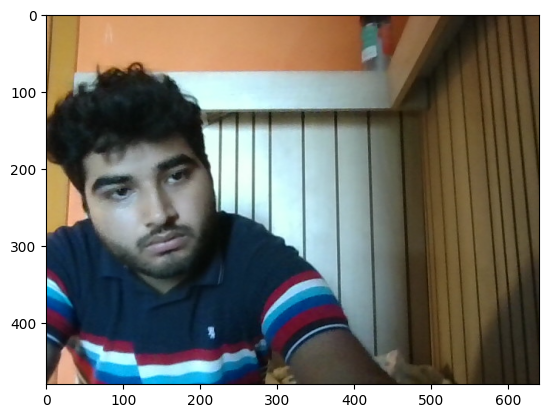

In [9]:
draw_landmarks(frame, results)
plt.imshow(cv2.cvtColor(frame, cv2.COLOR_BGR2RGB))

In [10]:
pose = []
for res in results.pose_landmarks.landmark:
    test = np.array([res.x, res.y, res.z, res.visibility])
    pose.append(test)

In [11]:
pose = np.array([[res.x, res.y, res.z, res.visibility] for res in results.pose_landmarks.landmark]).flatten() if results.pose_landmarks else np.zeros(132)
face = np.array([[res.x, res.y, res.z] for res in results.face_landmarks.landmark]).flatten() if results.face_landmarks else np.zeros(1404)
lh = np.array([[res.x, res.y, res.z] for res in results.left_hand_landmarks.landmark]).flatten() if results.left_hand_landmarks else np.zeros(21*3)
rh = np.array([[res.x, res.y, res.z] for res in results.right_hand_landmarks.landmark]).flatten() if results.right_hand_landmarks else np.zeros(21*3)

In [12]:
face = (
    np.array([[res.x, res.y, res.z] for res in results.face_landmarks.landmark]).flatten()
    if results.face_landmarks
    else np.zeros(1404)
)


In [13]:
def extract_keypoints(results):
    pose = np.array([[res.x, res.y, res.z, res.visibility] for res in results.pose_landmarks.landmark]).flatten() if results.pose_landmarks else np.zeros(33*4)
    face = np.array([[res.x, res.y, res.z] for res in results.face_landmarks.landmark]).flatten() if results.face_landmarks else np.zeros(468*3)
    lh = np.array([[res.x, res.y, res.z] for res in results.left_hand_landmarks.landmark]).flatten() if results.left_hand_landmarks else np.zeros(21*3)
    rh = np.array([[res.x, res.y, res.z] for res in results.right_hand_landmarks.landmark]).flatten() if results.right_hand_landmarks else np.zeros(21*3)
    return np.concatenate([pose, face, lh, rh])

In [14]:
result_test = extract_keypoints(results)


In [15]:
result_test

array([ 0.61641318,  0.6783157 , -1.77587986, ...,  0.        ,
        0.        ,  0.        ])

In [17]:
np.save('0', result_test)


In [19]:
np.load('0.npy')


array([ 0.71361881,  0.47527879, -0.88753289, ...,  0.        ,
        0.        ,  0.        ])

In [14]:
# Path for exported data, numpy arrays
DATA_PATH = os.path.join('C:/Users/anshu/OneDrive/Documents/Projects/mediapipe')

# Actions that we try to detect
actions = np.array(['Hello','Morning','Afternoon','Woman', 'Child', 'Thankyou','Study','Good'])

# Thirty videos worth of data
no_sequences = 10

# Videos are going to be 30 frames in length
sequence_length = 30

# Folder start (Now starting from 1)
start_folder = 1

In [102]:

# Path for exported data, numpy arrays
DATA_PATH = os.path.join('C:/Users/anshu/OneDrive/Documents/Projects/mediapipe')

# Actions that we try to detect
actions = np.array(['Hello','Morning','Afternoon','Woman', 'Child', 'Thankyou','Study','Good'])

# Thirty videos worth of data
no_sequences = 30

# Videos are going to be 30 frames in length
sequence_length = 30

# Folder start (Now starting from 1)
start_folder = 1

# Ensure the base directory exists
if not os.path.exists(DATA_PATH):
    os.makedirs(DATA_PATH)

for action in actions: 
    action_path = os.path.join(DATA_PATH, action)
    
    # Ensure the action directory exists
    if not os.path.exists(action_path):
        os.makedirs(action_path)
    
    # Find the maximum existing sequence number
    existing_sequences = np.array(os.listdir(action_path)).astype(int) if os.listdir(action_path) else np.array([0])
    dirmax = np.max(existing_sequences) if len(existing_sequences) > 0 else 0
    
    for sequence in range(1, no_sequences + 1):
        try: 
            os.makedirs(os.path.join(action_path, str(dirmax + sequence)))
        except Exception as e:
            print(f"An error occurred while creating directory: {e}")
            pass

In [103]:
cap = cv2.VideoCapture(0)
# Set mediapipe model 
with mp_holistic.Holistic(min_detection_confidence=0.5, min_tracking_confidence=0.5) as holistic:
    
    # Loop through actions
    for action in actions:
        # Loop through sequences aka videos
        for sequence in range(start_folder, start_folder + no_sequences):
            # Create a new folder for each sequence
            sequence_path = os.path.join(DATA_PATH, action, str(sequence))
            if not os.path.exists(sequence_path):
                os.makedirs(sequence_path)

            # Loop through video length aka sequence length
            for frame_num in range(sequence_length):
                
                # Read feed
                ret, frame = cap.read()

                # Make detections
                image, results = mediapipe_detection(frame, holistic)

                # Draw landmarks
                draw_styled_landmarks(image, results)

                # Resize the frame (Optional)
                frame = cv2.resize(frame, (960, 720))  # Adjust the size as needed
                
                # Apply wait logic for the first frame
                if frame_num == 0: 
                    cv2.putText(image, 'STARTING COLLECTION', (120, 200), 
                               cv2.FONT_HERSHEY_SIMPLEX, 1, (0, 255, 0), 4, cv2.LINE_AA)
                    cv2.putText(image, f'Collecting frames for {action} Video Number {sequence}', (15, 12), 
                               cv2.FONT_HERSHEY_SIMPLEX, 0.5, (0, 0, 255), 1, cv2.LINE_AA)
                    cv2.imshow('OpenCV Feed', image)
                    cv2.waitKey(500)
                else:
                    cv2.putText(image, f'Collecting frames for {action} Video Number {sequence}', (15, 12), 
                               cv2.FONT_HERSHEY_SIMPLEX, 0.5, (0, 0, 255), 1, cv2.LINE_AA)
                    cv2.imshow('OpenCV Feed', image)
                
                # Export keypoints
                keypoints = extract_keypoints(results)
                npy_path = os.path.join(sequence_path, str(frame_num) + ".npy")
                np.save(npy_path, keypoints)

                # Break gracefully
                if cv2.waitKey(10) & 0xFF == ord('q'):
                    break
                    
cap.release()
cv2.destroyAllWindows()


In [ ]:
# action_to_capture = 'Study'

# # Path for exported data, numpy arrays
# DATA_PATH = os.path.join('C:/Users/anshu/OneDrive/Documents/Projects/mediapipe', action_to_capture)

# # Number of videos worth of data
# no_sequences = 10

# # Videos are going to be 30 frames in length
# sequence_length = 30

# cap = cv2.VideoCapture(0)
# if not cap.isOpened():
#     print("Error: Could not open webcam.")
#     exit()

# # Set mediapipe model 
# with mp_holistic.Holistic(min_detection_confidence=0.5, min_tracking_confidence=0.5) as holistic:
    
#     # Loop through sequences aka videos
#     for sequence in range(1, no_sequences + 1):
#         sequence_path = os.path.join(DATA_PATH, str(sequence))
        
#         # Loop through video length aka sequence length
#         for frame_num in range(sequence_length):
            
#             # Read feed
#             ret, frame = cap.read()
#             if not ret:
#                 print("Error: Failed to capture image.")
#                 break

#             # Make detections
#             image, results = mediapipe_detection(frame, holistic)

#             # Draw landmarks
#             draw_styled_landmarks(image, results)
            
#             # Apply wait logic for the first frame
#             if frame_num == 0: 
#                 cv2.putText(image, 'STARTING COLLECTION', (120, 200), 
#                            cv2.FONT_HERSHEY_SIMPLEX, 1, (0, 255, 0), 4, cv2.LINE_AA)
#                 cv2.putText(image, f'Collecting frames for {action_to_capture} Video Number {sequence}', (15, 12), 
#                            cv2.FONT_HERSHEY_SIMPLEX, 0.5, (0, 0, 255), 1, cv2.LINE_AA)
#                 cv2.imshow('OpenCV Feed', image)
#                 cv2.waitKey(500)
#             else:
#                 cv2.putText(image, f'Collecting frames for {action_to_capture} Video Number {sequence}', (15, 12), 
#                            cv2.FONT_HERSHEY_SIMPLEX, 0.5, (0, 0, 255), 1, cv2.LINE_AA)
#                 cv2.imshow('OpenCV Feed', image)
            
#             # Export keypoints
#             keypoints = extract_keypoints(results)
#             npy_path = os.path.join(sequence_path, str(frame_num) + ".npy")
#             np.save(npy_path, keypoints)

#             # Break gracefully
#             if cv2.waitKey(10) & 0xFF == ord('q'):
#                 break

# cap.release()
# cv2.destroyAllWindows()

In [172]:
cap.release()
cv2.destroyAllWindows()

In [15]:
from sklearn.model_selection import train_test_split
from tensorflow.keras.utils import to_categorical

In [16]:
label_map = {label:num for num, label in enumerate(actions)}


In [17]:
label_map

{'Hello': 0,
 'Morning': 1,
 'Afternoon': 2,
 'Woman': 3,
 'Child': 4,
 'Thankyou': 5,
 'Study': 6,
 'Good': 7}

In [29]:
# sequences, labels = [], []
# label_map = {label: num for num, label in enumerate(actions)}

# for action in actions:
#     action_path = os.path.join(DATA_PATH, action)
#     sequence_folders = [folder for folder in os.listdir(action_path) if os.path.isdir(os.path.join(action_path, folder))]
    
#     for sequence in sequence_folders:
#         sequence_path = os.path.join(action_path, sequence)
        
#         window = []
#         for frame_num in range(sequence_length):
#             npy_file = os.path.join(sequence_path, f"{frame_num}.npy")
#             if os.path.exists(npy_file):
#                 res = np.load(npy_file)
#                 window.append(res)
#             else:
#                 print(f"Missing file: {npy_file}")

#         if window:
#             sequences.append(window)
#             labels.append(label_map[action])


In [18]:
sequences, labels = [], []

In [19]:
# Ensure that the number of sequences and labels matches the number of actions
sequences, labels = [], []

for action in actions:
    action_path = os.path.join(DATA_PATH, action)
    sequence_folders = [folder for folder in os.listdir(action_path) if os.path.isdir(os.path.join(action_path, folder))]
    
    for sequence in sequence_folders:
        sequence_path = os.path.join(action_path, sequence)
        
        window = []
        for frame_num in range(sequence_length):
            npy_file = os.path.join(sequence_path, f"{frame_num}.npy")
            if os.path.exists(npy_file):
                res = np.load(npy_file)
                window.append(res)
            else:
                print(f"Missing file: {npy_file}")

        if window:
            sequences.append(window)
            labels.append(label_map[action])


In [20]:

np.array(sequences).shape

(240, 30, 1662)

In [21]:
np.array(labels).shape

(240,)

In [22]:
X = np.array(sequences)

In [23]:
X.shape

(240, 30, 1662)

In [24]:
y = to_categorical(labels).astype(int)


In [25]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.05)


In [26]:
y_test.shape


(12, 8)

In [27]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense
from tensorflow.keras.callbacks import TensorBoard

In [28]:
log_dir = os.path.join('Logs')
tb_callback = TensorBoard(log_dir=log_dir)

In [148]:
# from tensorflow.keras.models import Sequential
# from tensorflow.keras.layers import LSTM, Dense

# # Number of classes
# num_classes = len(actions)

# # Define the model
# model = Sequential()
# model.add(LSTM(64, return_sequences=True, activation='relu', input_shape=(30, 1662)))
# model.add(LSTM(128, return_sequences=True, activation='relu'))
# model.add(LSTM(64, return_sequences=False, activation='relu'))
# model.add(Dense(64, activation='relu'))
# model.add(Dense(32, activation='relu'))
# model.add(Dense(num_classes, activation='softmax'))  # Ensure num_classes matches the number of classes

# # Compile the model
# model.compile(optimizer='adam',
#               loss='categorical_crossentropy',
#               metrics=['accuracy'])



In [149]:
# model.compile(optimizer='Adam', loss='categorical_crossentropy', metrics=['categorical_accuracy'])

In [ ]:
# from tensorflow.keras.models import Sequential
# from tensorflow.keras.layers import LSTM, Dense, Dropout, BatchNormalization
# from tensorflow.keras.callbacks import EarlyStopping

# # Number of classes
# num_classes = len(actions)

# # Define the model
# model = Sequential()
# model.add(LSTM(64, return_sequences=True, activation='relu', input_shape=(30, 1662)))
# model.add(BatchNormalization()) # Add batch normalization
# model.add(Dropout(0.3)) # Add dropout

# model.add(LSTM(128, return_sequences=True, activation='relu'))
# model.add(BatchNormalization()) # Add batch normalization
# model.add(Dropout(0.3)) # Add dropout

# model.add(LSTM(64, return_sequences=False, activation='relu'))
# model.add(BatchNormalization()) # Add batch normalization
# model.add(Dropout(0.3)) # Add dropout

# model.add(Dense(64, activation='relu'))
# model.add(Dense(32, activation='relu'))
# model.add(Dense(num_classes, activation='softmax')) # Ensure num_classes matches the number of classes

# # Compile the model
# model.compile(optimizer='adam',
#                  loss='categorical_crossentropy',
#                  metrics=['accuracy'])

# # Early stopping
# # early_stopping = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)

# # Train the model
# model.fit(X_train, y_train,
#                    epochs=200,
#                    batch_size=32,
#                    validation_data=(X_test, y_test))
#                 #    callbacks=[early_stopping])

In [29]:
num_classes = 8

In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense

# Assuming your npy arrays represent images or features that can be reshaped into 2D tensors
image_height, image_width, channels = (30, 1662, 1) 

In [31]:
model = Sequential()
model.add(Conv2D(32, (3, 3), activation='relu', input_shape=(image_height, image_width, channels)))
model.add(MaxPooling2D((2, 2)))
model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(MaxPooling2D((2, 2)))
model.add(Flatten())
model.add(Dense(64, activation='relu'))
model.add(Dense(num_classes, activation='softmax'))



Epoch 1/100


c:\Users\anshu\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


8/8 ━━━━━━━━━━━━━━━━━━━━ 3s 232ms/step - accuracy: 0.1206 - loss: 4.8555 - val_accuracy: 0.0000e+00 - val_loss: 2.1627
Epoch 2/100
8/8 ━━━━━━━━━━━━━━━━━━━━ 2s 213ms/step - accuracy: 0.2304 - loss: 2.0803 - val_accuracy: 0.2500 - val_loss: 2.0638
Epoch 3/100
8/8 ━━━━━━━━━━━━━━━━━━━━ 2s 217ms/step - accuracy: 0.2886 - loss: 2.0197 - val_accuracy: 0.0000e+00 - val_loss: 2.1419
Epoch 4/100
8/8 ━━━━━━━━━━━━━━━━━━━━ 2s 215ms/step - accuracy: 0.2587 - loss: 1.9661 - val_accuracy: 0.1667 - val_loss: 2.3078
Epoch 5/100
8/8 ━━━━━━━━━━━━━━━━━━━━ 2s 211ms/step - accuracy: 0.2877 - loss: 1.8583 - val_accuracy: 0.2500 - val_loss: 1.9302
Epoch 6/100
8/8 ━━━━━━━━━━━━━━━━━━━━ 2s 214ms/step - accuracy: 0.4783 - loss: 1.5820 - val_accuracy: 0.5000 - val_loss: 1.6067
Epoch 7/100
8/8 ━━━━━━━━━━━━━━━━━━━━ 2s 212ms/step - accuracy: 0.4876 - loss: 1.4248 - val_accuracy: 0.3333 - val_loss: 1.6890
Epoch 8/100
8/8 ━━━━━━━━━━━━━━━━━━━━ 2s 208ms/step - accuracy: 0.5026 - loss: 1.2626 - val_accuracy: 0.7500 - val_l

KeyboardInterrupt: 

In [ ]:
# Compile the model
model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])
model.fit(X_train, y_train,
                   epochs=100,
                   batch_size=32,
                   validation_data=(X_test, y_test))
                #    callbacks=[early_stopping])

In [32]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 28, 1660, 32)   │           320 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 14, 830, 32)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 12, 828, 64)    │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 6, 414, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 158976)         │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 64)             │    10,174,528 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 8)              │           520 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 30,581,594 (116.66 MB)

 Trainable params: 10,193,864 (38.89 MB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 20,387,730 (77.77 MB)

In [33]:

res = model.predict(X_test)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 62ms/step


In [34]:
actions[np.argmax(res[9])]

'Morning'

In [35]:
actions[np.argmax(y_test[9])]


'Morning'

In [36]:
model.save('action3.h5')

In [54]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense

# Assuming your npy arrays represent images or features that can be reshaped into 2D tensors
image_height, image_width, channels = (30, 1662, 1)  # Adjust these dimensions based on your data

# Define the CNN model
model = Sequential()

In [30]:
model.load_weights('action3.h5')

NameError: name 'model' is not defined

In [37]:
from sklearn.metrics import multilabel_confusion_matrix, accuracy_score

In [38]:
yhat = model.predict(X_test)



1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step


In [39]:
ytrue = np.argmax(y_test, axis=1).tolist()
yhat = np.argmax(yhat, axis=1).tolist()

In [40]:

multilabel_confusion_matrix(ytrue, yhat)

array([[[ 9,  0],
        [ 0,  3]],

       [[10,  0],
        [ 0,  2]],

       [[ 9,  0],
        [ 0,  3]],

       [[11,  0],
        [ 0,  1]],

       [[ 9,  0],
        [ 0,  3]]], dtype=int64)

In [41]:
accuracy_score(ytrue, yhat)

1.0

In [42]:
colors = [(245, 117, 16), (117, 245, 16), (16, 117, 245), (255, 0, 0), (0, 255, 0), (0, 0, 255), (255, 255, 0)]
def prob_viz(res, actions, input_frame, colors):
    output_frame = input_frame.copy()
    for num, prob in enumerate(res):
        cv2.rectangle(output_frame, (0,60+num*40), (int(prob*100), 90+num*40), colors[num], -1)
        cv2.putText(output_frame, actions[num], (0, 85+num*40), cv2.FONT_HERSHEY_SIMPLEX, 1, (255,255,255), 2, cv2.LINE_AA)
        
    return output_frame

In [82]:
# sequence = []
# sentence = []
# predictions = []
# threshold = 0.5

# cap = cv2.VideoCapture(0)
# # Set mediapipe model 
# with mp_holistic.Holistic(min_detection_confidence=0.5, min_tracking_confidence=0.5) as holistic:
#     while cap.isOpened():

#         # Read feed
#         ret, frame = cap.read()

#         # Make detections
#         image, results = mediapipe_detection(frame, holistic)
        
#         # Debug prints
#         print("Results:", results)
        
#         # Draw landmarks
#         draw_styled_landmarks(image, results)
        
#         # 2. Prediction logic
#         keypoints = extract_keypoints(results)
#         sequence.append(keypoints)
#         sequence = sequence[-30:]
        
#         if len(sequence) == 30:
#             res = model.predict(np.expand_dims(sequence, axis=0))[0]
            
#             # Debug prints
#             print("Shape of res:", res.shape)
#             print("Current prediction:", res)
#             print("Predicted class index:", np.argmax(res))
#             print("Actions array size:", len(actions))
            
#             if np.argmax(res) < len(actions):
#                 print("Action predicted:", actions[np.argmax(res)])
#                 predictions.append(np.argmax(res))
                
#                 # 3. Viz logic
#                 if len(predictions) >= 10 and np.unique(predictions[-10:])[0] == np.argmax(res): 
#                     if res[np.argmax(res)] > threshold: 
#                         if len(sentence) > 0: 
#                             if actions[np.argmax(res)] != sentence[-1]:
#                                 sentence.append(actions[np.argmax(res)])
#                         else:
#                             sentence.append(actions[np.argmax(res)])

#                 if len(sentence) > 5: 
#                     sentence = sentence[-5:]

#                 # Viz probabilities
#                 image = prob_viz(res, actions, image, colors)
            
#         cv2.rectangle(image, (0,0), (640, 40), (245, 117, 16), -1)
#         cv2.putText(image, ' '.join(sentence), (3,30), 
#                        cv2.FONT_HERSHEY_SIMPLEX, 1, (255, 255, 255), 2, cv2.LINE_AA)
        
#         # Show to screen
#         cv2.imshow('OpenCV Feed', image)

#         # Break gracefully
#         if cv2.waitKey(10) & 0xFF == ord('q'):
#             break

#     cap.release()
#     cv2.destroyAllWindows()


In [44]:
sequence = []
sentence = []
threshold = 0.5

cap = cv2.VideoCapture(0)
# Set mediapipe model 
with mp_holistic.Holistic(min_detection_confidence=0.5, min_tracking_confidence=0.5) as holistic:
  while cap.isOpened():

    # Read feed
    ret, frame = cap.read()

    # Make detections
    image, results = mediapipe_detection(frame, holistic)
    
    # Draw landmarks
    draw_styled_landmarks(image, results)
    
    # Prediction logic
    keypoints = extract_keypoints(results)
    sequence.append(keypoints)
    sequence = sequence[-30:]
    
    if len(sequence) == 30:
      res = model.predict(np.expand_dims(sequence, axis=0))[0]
      predicted_action = actions[np.argmax(res)]
      
      # Update sentence only if action is consistent and confident
      if len(sentence) > 0 and predicted_action != sentence[-1] and res[np.argmax(res)] > threshold:
        sentence.append(predicted_action)
      
      # Limit sentence length
      if len(sentence) > 5: 
        sentence = sentence[-5:]

      # Display only the latest action (optional)
      cv2.rectangle(image, (0,0), (640, 40), (245, 117, 16), -1)
      cv2.putText(image, predicted_action, (3,30), 
                 cv2.FONT_HERSHEY_SIMPLEX, 1, (255, 255, 255), 2, cv2.LINE_AA)

    # Show to screen
    cv2.imshow('OpenCV Feed', image)

    # Break gracefully
    if cv2.waitKey(10) & 0xFF == ord('q'):
      break

cap.release()
cv2.destroyAllWindows()

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step
1/1 ━━━━━━━━

In [68]:
cap.release()
cv2.destroyAllWindows()

In [ ]:
import time  # Import the time module

sequence = []
sentence = []
threshold = 0.5
delay_time = 2  # Delay in seconds between outputs

cap = cv2.VideoCapture(0)
# Set mediapipe model 
with mp_holistic.Holistic(min_detection_confidence=0.5, min_tracking_confidence=0.5) as holistic:
    while cap.isOpened():

        # Read feed
        ret, frame = cap.read()

        # Make detections
        image, results = mediapipe_detection(frame, holistic)
        
        # Draw landmarks
        draw_styled_landmarks(image, results)
        
        # Prediction logic
        keypoints = extract_keypoints(results)
        sequence.append(keypoints)
        sequence = sequence[-30:]
        
        if len(sequence) == 30:
            res = model.predict(np.expand_dims(sequence, axis=0))[0]
            predicted_action = actions[np.argmax(res)]
            
            # Update sentence only if action is consistent and confident
            if len(sentence) > 0 and predicted_action != sentence[-1] and res[np.argmax(res)] > threshold:
                sentence.append(predicted_action)
                time.sleep(delay_time)  # Add delay after updating the sentence
            
            # Limit sentence length
            if len(sentence) > 5: 
                sentence = sentence[-5:]

            # Display only the latest action
            cv2.rectangle(image, (0,0), (640, 40), (245, 117, 16), -1)
            cv2.putText(image, predicted_action, (3,30), 
                       cv2.FONT_HERSHEY_SIMPLEX, 1, (255, 255, 255), 2, cv2.LINE_AA)

        # Show to screen
        cv2.imshow('OpenCV Feed', image)

        # Break gracefully
        if cv2.waitKey(10) & 0xFF == ord('q'):
            break

cap.release()
cv2.destroyAllWindows()
